In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

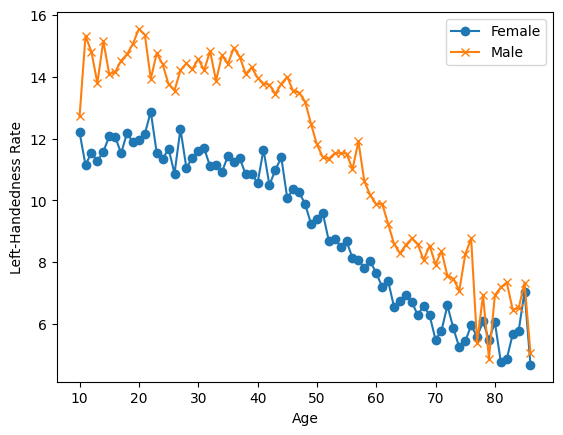

In [3]:
%matplotlib inline
fig, ax = plt.subplots()  # Create figure and axis objects
ax.plot(lefthanded_data['Age'], lefthanded_data['Female'], label='Female', marker='o')
ax.plot(lefthanded_data['Age'], lefthanded_data['Male'], label='Male', marker='x')
ax.legend()  # Add a legend
ax.set_xlabel('Age')
ax.set_ylabel('Left-Handedness Rate')
plt.show()  # Show the plot

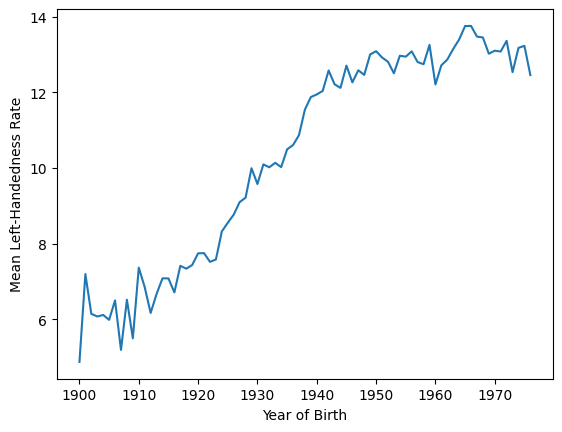

In [4]:
# Create a new column for birth year of each age
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']

# Create a new column for the average of male and female
lefthanded_data['Mean_lh'] = (lefthanded_data['Female'] + lefthanded_data['Male']) / 2

# Create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot(lefthanded_data['Birth_year'], lefthanded_data['Mean_lh'])
ax.set_xlabel('Year of Birth')
ax.set_ylabel('Mean Left-Handedness Rate')
plt.show()  # Show the plot

In [5]:
import numpy as np

def P_lh_given_A(ages_of_death, study_year=1990):
    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start
    early_1900s_rate = lefthanded_data['Mean_lh'].head(10).mean()
    late_1900s_rate = lefthanded_data['Mean_lh'].tail(10).mean()
    
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    
    youngest_age = study_year - 1986 + 10  # the youngest age is 10
    oldest_age = study_year - 1986 + 86    # the oldest age is 86
    
    P_return = np.zeros(ages_of_death.shape)  # Create an empty array to store the results
    
    P_return[ages_of_death > oldest_age] = late_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = early_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

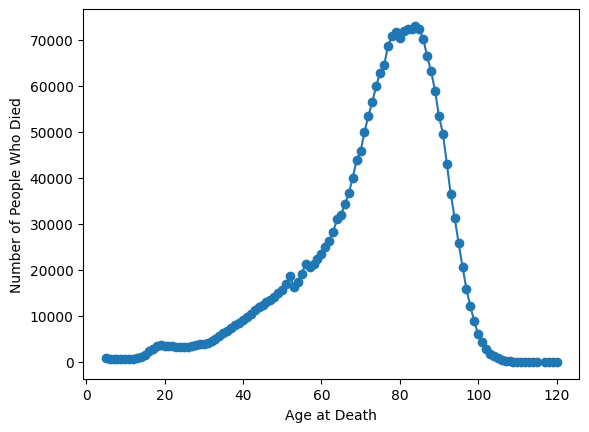

In [15]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
df=pd.read_csv(data_url_2)
df
# Load death distribution data
death_distribution_data = pd.read_csv(data_url_2, delimiter='\t', skiprows=6)
death_distribution_data.rename(columns={'4':'Age','838':'Both Sexes','474':'Male','364':'Female'},inplace=True)
death_distribution_data
# Drop NaN values from the 'Both Sexes' column
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

# Plot the number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot(death_distribution_data['Age'], death_distribution_data['Both Sexes'], marker='o')
ax.set_xlabel('Age at Death')
ax.set_ylabel('Number of People Who Died')
plt.show()  # Show the plot


In [16]:
def P_lh(death_distribution_data, study_year=1990):
    p_list = P_lh_given_A(death_distribution_data['Age'], study_year) * death_distribution_data['Both Sexes']
    p = p_list.sum()
    return p / death_distribution_data['Both Sexes'].sum()

print("The overall probability of left-handedness is:", P_lh(death_distribution_data))



The overall probability of left-handedness is: 0.07691451012223073


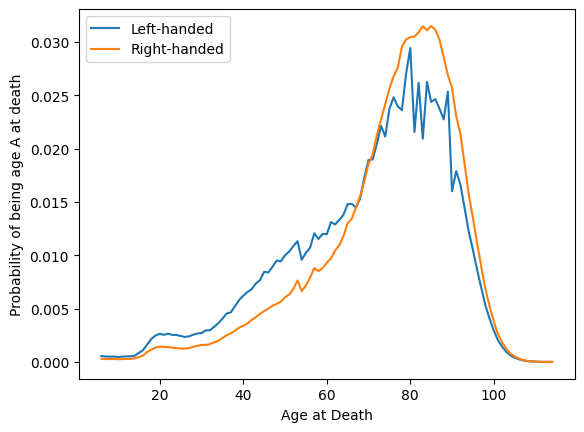

In [27]:
# Task 6: Creating a Function for P(A | LH) - Probability of Being Age A at Death Given Left-Handed
def P_A_given_lh(ages, death_distribution_data, study_year=1990):
    P_A = death_distribution_data['Both Sexes'][:len(ages)]  # Slice to match the shape of 'ages'
    P_left = P_lh(death_distribution_data, study_year)
    P_lh_A = P_lh_given_A(ages, study_year)
    return P_lh_A * P_A / P_left

# Task 7: Creating a Function for P(A | RH) - Probability of Being Age A at Death Given Right-Handed
def P_A_given_rh(ages, death_distribution_data, study_year=1990):
    P_A = death_distribution_data['Both Sexes'][:len(ages)]  # Slice to match the shape of 'ages'
    P_right = 1 - P_lh(death_distribution_data, study_year)  # P_right = 1 - P_left
    P_rh_A = 1 - P_lh_given_A(ages, study_year)  # P_rh_A = 1 - P_lh_A
    return P_rh_A * P_A / P_right

# Task 8: Plotting Conditional Probability Distributions
ages = np.arange(6, 115, 1)  # Make a list of ages of death to plot

# Calculate the probability of being left-handed for each age
left_handed_probability = P_A_given_lh(ages, death_distribution_data)

# Calculate the probability of being right-handed for each age
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

# Normalize the probabilities
left_handed_probability /= left_handed_probability.sum()
right_handed_probability /= right_handed_probability.sum()

# Create a plot of the two probabilities vs. age
fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label="Left-handed")
ax.plot(ages, right_handed_probability, label="Right-handed")
ax.legend()
ax.set_xlabel("Age at Death")
ax.set_ylabel("Probability of being age A at death")
plt.show()  # Show the plot


In [28]:
# Calculate average ages for left-handed and right-handed groups
average_lh_age = np.nansum(ages * np.array(left_handed_probability))
average_rh_age = np.nansum(ages * np.array(right_handed_probability))

print("The difference in average ages is", round(average_rh_age - average_lh_age, 1), "years.")



The difference in average ages is 4.9 years.
